In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
salaries = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")


In [9]:
salaries.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<h1>1) General Salary Data</h1>

**Histogram of the Salaries**

We decided to start with a histogram of the Salaries, using salary_in_usd  to see the distribution of all the salaries.
<br>
We noticed that distribution is right-skewed, which would suggest that the mean, and medium would be between the 100 - 200k range. It would also suggest that salaries on the left side, or less than 200k are going to be common, than higher than 200k.


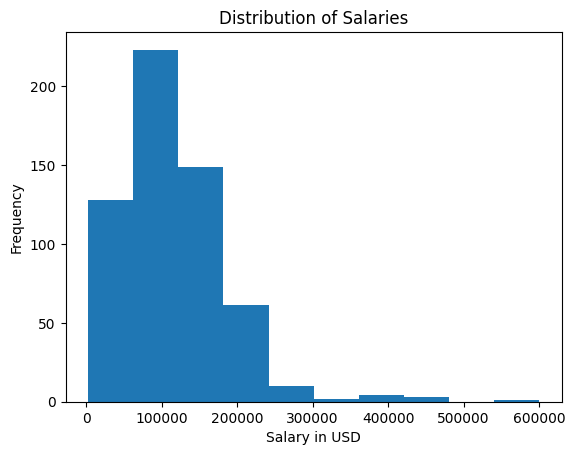

In [10]:
plt.hist(salaries['salary_in_usd'])
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

The Data is right skewed

<h1> 2) Effect of Experience on Salary </h1>

**Box Plot of Salary and Experience Level**
<br>
Looking at the medians of each box, we noticed a slight increase with each level, and that makes sense in the real world because the entry level or 'en' would make the least, and the executive level would make the most.

We also noticed that the boxes for entry, middle, and senior have similar compact boxes, but the boxes for the executive level are a lot wider. That could suggest that the other levels have less variation due to other factors such as company size but being an executive can vary depending on other factors.

We found it interesting that each level did have outliers. This could suggest that those outliers have to do with specializations within the data science field or that those positions were in high demand when they were hired.



<Figure size 800x600 with 0 Axes>

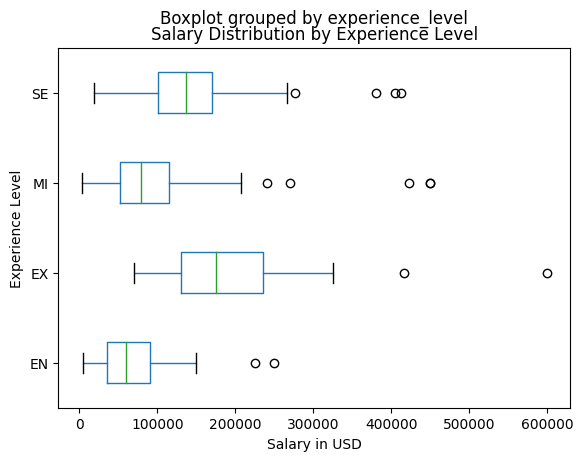

In [11]:
plt.figure(figsize=(8, 6))
salaries.boxplot(column='salary_in_usd', by='experience_level', vert=False, grid=False)
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.title('Salary Distribution by Experience Level')
plt.show()

<h1> 3) Impact of Company Size on Salary

**Box Plot**
<br>
Hello world

<Figure size 800x600 with 0 Axes>

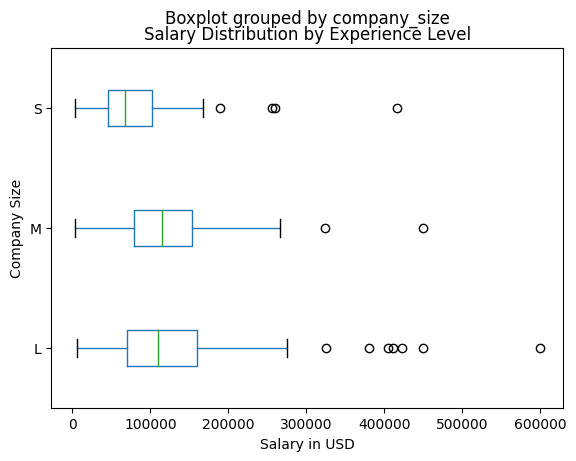

In [12]:
plt.figure(figsize=(8, 6))
salaries.boxplot(column='salary_in_usd', by='company_size', vert=False, grid=False)
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')
plt.title('Salary Distribution by Experience Level')
plt.show()

<h1> 4) Job Title Analysis </h1>


In [13]:
pd.crosstab(salaries["job_title"],salaries["salary_in_usd"])

salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
job_title,,,,,,,,,,,,,,,,,,,,,
3D Computer Vision Researcher,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AI Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Analytics Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Applied Data Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Applied Machine Learning Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BI Data Analyst,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Architect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Engineer,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Business Data Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#title = str(pd.Series(salaries["job_title"]).value_counts())

title = pd.Series(salaries["job_title"])
my_title = title.str.contains("Data Scientist")
#my_title.value_counts()
#title.count("Data Scientist")
print(my_title)

print(title.value_counts())
#title.str.contains("Data Scientist", regex=False)
#title.str.contains("Data Analyst")


0       True
1      False
2      False
3      False
4      False
       ...  
576    False
577    False
578    False
579    False
580    False
Name: job_title, Length: 581, dtype: bool
job_title
Data Scientist                              134
Data Engineer                               129
Data Analyst                                 97
Machine Learning Engineer                    39
Research Scientist                           16
Data Architect                               11
Data Science Manager                         10
Machine Learning Scientist                    8
Data Analytics Manager                        7
Director of Data Science                      7
Principal Data Scientist                      7
Data Science Consultant                       7
AI Scientist                                  6
Big Data Engineer                             6
Lead Data Engineer                            6
Computer Vision Engineer                      6
BI Data Analyst                      

we focused on 'Data scientist" with a total of 134 in this data set it was actually the most widley used title

<h1> 5) Interactions Between Relationships</h1>


In [71]:
pd.crosstab(salaries["job_title"],salaries["experience_level"])
#experiance.show()

#plt.show()

#print(experiance)
#print(size)

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,0,0,1,0
AI Scientist,3,0,2,1
Analytics Engineer,0,2,0,2
Applied Data Scientist,1,0,2,2
Applied Machine Learning Scientist,1,0,3,0
BI Data Analyst,2,1,2,0
Big Data Architect,0,0,0,1
Big Data Engineer,2,0,2,2
Business Data Analyst,2,0,2,0


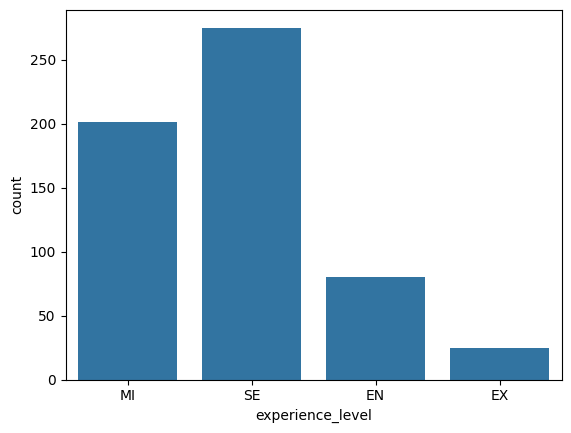

In [72]:
experiance = pd.crosstab(salaries["job_title"],salaries["experience_level"])
experiance2 = sns.countplot(x="experience_level", data=salaries)
plt.show()

In [70]:
pd.crosstab(salaries["job_title"],salaries["company_size"])


company_size,L,M,S
job_title,,,
3D Computer Vision Researcher,0,1,0
AI Scientist,2,2,2
Analytics Engineer,0,4,0
Applied Data Scientist,5,0,0
Applied Machine Learning Scientist,2,2,0
BI Data Analyst,1,2,2
Big Data Architect,0,1,0
Big Data Engineer,2,2,2
Business Data Analyst,4,0,0


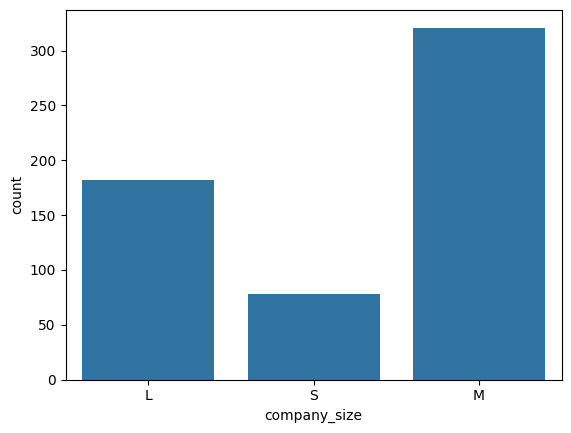

In [68]:
size = pd.crosstab(salaries["job_title"],salaries["company_size"])
size2 = sns.countplot(x="company_size", data=salaries)
plt.show()


here we see that mid sized compaies employ the most people in the most people in this area.

experiance level is interesting, the most people are midlevel to senior level.
with the fewest being executive and entry level.
this might suggest that it is hard to get your foot in the door but a great career path to stay in.

<h1> 6) Conclusion </h1>


most make at least 100k
exsecutives make the most and have the highest median
senior engineer has the biggest spread in slarey

the large and medium companies make considerably more than small companies
the large companies also have the most outliers

most of the jobs are data scientist or closely related to it with data scientist being the most common job title

most peope employed here are midlevel or senior and most are at a mid to larg company